In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
!pip install fitter

  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25036 sha256=48e23e884144f922c42142162ba741f59f0e67951b7316f9c3b95eb2964a43ab
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\26\07\d7\685f1a5643d927b18e983ec3cf3b4ff18ec4e1bdbfc1455301
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=d337f9dacf0a289f90c2db7beebab50520862e5f0f307ca7202ebd8d57cd2d87
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\91\1a\c5\9dfcc86c5bb27991b4dd27741dd03847dfca83ce975c186ddb
Successfully built fitter easydev


In [3]:
from fitter import Fitter,get_common_distributions, get_distributions

In [4]:
# Importing the datas
data =pd.read_excel('Jishu Raj Baruah_213110045_Datas_Building Energy Efficiency.xls')

In [5]:
data


,Relative Compactness,Surface Area(in m^2),Wall Area(in m^2),Roof Area(in m^2),Overall Height( in m),"Orientation( 2:North, 3:East, 4:South, 5:West)","Glazing Area(0%,10%,25%,40% of floor area)","Glazing Area Distribution\n(1: Uniform, 2:North, 3:East, 4:South, 5:West)",Heating_load,Cooling_load
0,0.7638,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.9800,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.9800,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.9800,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.9000,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.6400,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.6200,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.6200,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.6200,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [6]:
# Filling Null value with mean value
data= data.fillna(data.mean())
data

,Relative Compactness,Surface Area(in m^2),Wall Area(in m^2),Roof Area(in m^2),Overall Height( in m),"Orientation( 2:North, 3:East, 4:South, 5:West)","Glazing Area(0%,10%,25%,40% of floor area)","Glazing Area Distribution\n(1: Uniform, 2:North, 3:East, 4:South, 5:West)",Heating_load,Cooling_load
0,0.7638,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.9800,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.9800,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.9800,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.9000,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.6400,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.6200,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.6200,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.6200,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [7]:
# Statistical summary of the datas
data.describe()

,Relative Compactness,Surface Area(in m^2),Wall Area(in m^2),Roof Area(in m^2),Overall Height( in m),"Orientation( 2:North, 3:East, 4:South, 5:West)","Glazing Area(0%,10%,25%,40% of floor area)","Glazing Area Distribution\n(1: Uniform, 2:North, 3:East, 4:South, 5:West)",Heating_load,Cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.763885,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105490,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.820000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


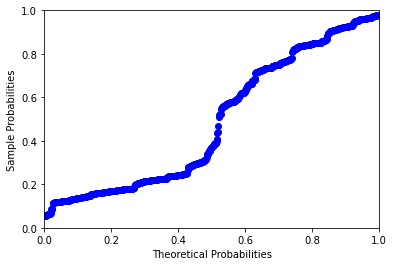

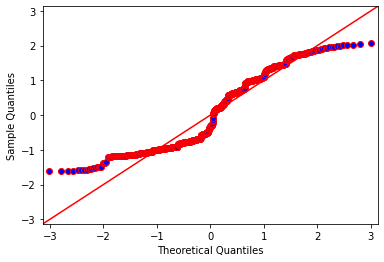

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Heating_load', ylabel='Density'>

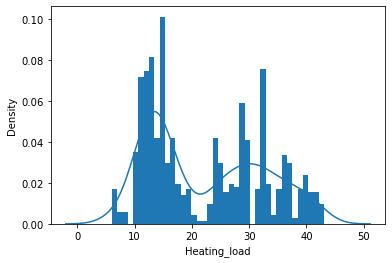

In [8]:
# Plotting P-P plot, Q-Q plot and distribution plot for Heating_load Column
pp=sm.ProbPlot(data['Heating_load'],loc=0,scale=1,fit=True,a=1)
fig =pp.ppplot()

sm.qqplot(data['Heating_load'],line='45',fit=True,dist=stats.norm,color='red')
plt.show()

sns.distplot(data['Heating_load'],bins=40,kde=True,hist_kws={"linewidth":10,'alpha':1})


,sumsquare_error,aic,bic,kl_div
f,0.081484,776.093573,-7001.499894,inf
gamma,0.081492,774.162141,-7008.064874,inf
erlang,0.081492,774.162247,-7008.063504,inf
chi2,0.081492,774.162171,-7008.063398,inf
lognorm,0.082222,781.704765,-7001.219141,inf
uniform,0.086465,726.669478,-6969.221951,inf
norm,0.094028,767.673600,-6904.817253,inf
expon,0.096502,789.783769,-6884.875995,inf
beta,0.099090,756.231929,-6851.262658,inf


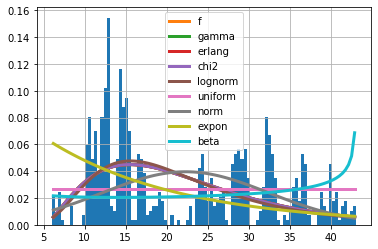

In [9]:
# Best fitting distribution comparison for Heating_column datas
fitting_test=Fitter(data['Heating_load'],distributions=['gamma','lognorm',"beta","chi2","norm","erlang","uniform","expon","f",])
fitting_test.fit()
fitting_test.summary(clf=True,lw=3,Nbest=9)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


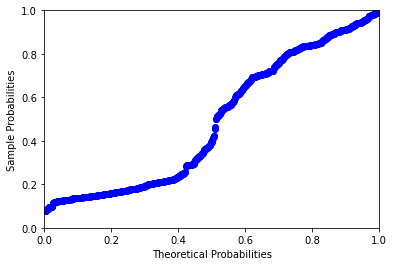

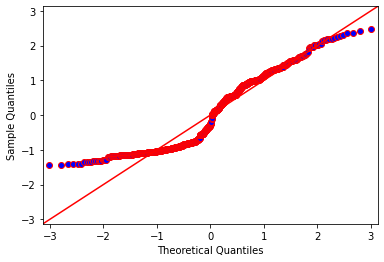

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cooling_load', ylabel='Density'>

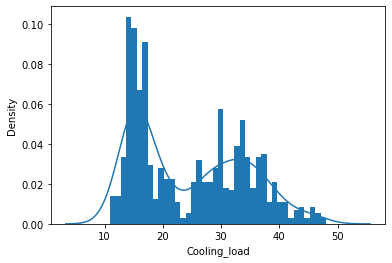

In [10]:
# Plotting P-P plot, Q-Q plot and distribution plot for Cooling_load Column
pp=sm.ProbPlot(data['Cooling_load'],loc=0,scale=1,fit=True,a=1)
fig =pp.ppplot()

sm.qqplot(data['Cooling_load'],line='45',fit=True,dist=stats.norm,color='red')
plt.show()

sns.distplot(data['Cooling_load'],bins=40,kde=True,hist_kws={"linewidth":10,'alpha':1})


,sumsquare_error,aic,bic,kl_div
f,0.060840,793.647588,-7225.883232,inf
lognorm,0.061084,804.893526,-7229.445474,inf
chi2,0.061202,790.036900,-7227.968023,inf
gamma,0.061202,790.036508,-7227.966174,inf
erlang,0.061202,790.037043,-7227.965899,inf
beta,0.067371,745.272292,-7147.568394,inf
expon,0.068792,798.564652,-7144.822649,inf
uniform,0.077104,726.885054,-7057.216875,inf
norm,0.079348,791.608507,-7035.190391,inf


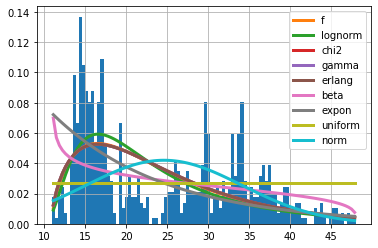

In [11]:
# Best fitting distribution comparison for Cooling_load column datas
fitting_test=Fitter(data['Cooling_load'],distributions=['gamma','lognorm',"beta","chi2","norm","erlang","uniform","expon","f",])
fitting_test.fit()
fitting_test.summary(clf=True,lw=3,Nbest=9)